In [88]:
%matplotlib inline
import changefinder
import pandas as pd 
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os

def str2datetime(tstr):
    if tstr.__class__.__name__ == "datetime":
        return tstr
    ts = tstr.split(".")[0]
    return dt.strptime(ts, "%Y-%m-%d %H:%M:%S")

def calc_bb(name, df, window=12):
    # Bollinger Band using 2sigma
    plt.figure(figsize=(20,5))
    plt.title(name)
    plt.plot(df.index, df[name])
    
    win_size = 4
    m_ave = df[name].rolling(window=int(win_size)).mean() #moving average using n hours window
    m = df[name].rolling(window=window).mean()
    sigma = df[name].rolling(window=window).std()
    
    df["m"] = m
    df["m+2s"] = m+2*sigma
    df["m-2s"] = m-2*sigma
    
    #df["up"] = df[name] - df["m+2s"]
    #df["down"] = df["m-2s"] - df[name]
    
    df["up"] = m_ave - df["m+2s"]
    df["down"] = df["m-2s"] - m_ave
    
    plt.plot(df.index,m,label="{} hour average".format(window*1))
    plt.plot(df.index,m+2*sigma,label="$+2\sigma$",color="grey",alpha=0.6,linestyle="dotted")
    plt.plot(df.index,m-2*sigma,label="$-2\sigma$",color="grey",alpha=0.6,linestyle="dotted")
    plt.plot(df.index,m_ave,label="mov ave window = "+str(win_size)+" hour",color="green",alpha=0.4)
    
    #plt.fill_between(df.index, -500, 1500, where=df.index > 141, facecolor='green', alpha=0.1)
    #plt.fill_between(df.index, 0.8, 1.6, where=df.index >= 120, facecolor='pink', alpha=0.1)
    xticks = (np.arange(max(df.index), min(df.index)-1, -2))
    
    
    #plt.plot(df.index, df[name].rolling(window=3*window).mean(),label="{}min".format(window*30))
    '''

    for i in range(1,len(df)):
        if df.iloc[i-1]["up"] < 0 and df.iloc[i]["up"] >= 0:
            #print("change point increase time:{}".format(df.iloc[i]["timestamp"]))
            plt.plot(df.index[i],df.iloc[i][name],"o",color="red",markersize=6)
        if df.iloc[i-1]["down"] < 0 and df.iloc[i]["down"] >= 0:
            #print("change point decrease time:{}".format(df.iloc[i]["timestamp"]))
            plt.plot(df.index[i],df.iloc[i][name],"o",color="blue",markersize=6)
    '''
            
    plt.xticks(xticks, xticks[::-1])
    plt.xlabel('hour to calving')
    plt.ylabel(name)
    plt.xlim(120,144)
    plt.legend(loc=2)
    plt.title('ID ' + f[32:-8])
    #plt.savefig(f'{f[:-9]}_acc_win_12_2.jpg', bbox_inches='tight')
    
    plt.show()
      

./Documents/namiki_excel/ascend/10815_asc.csv


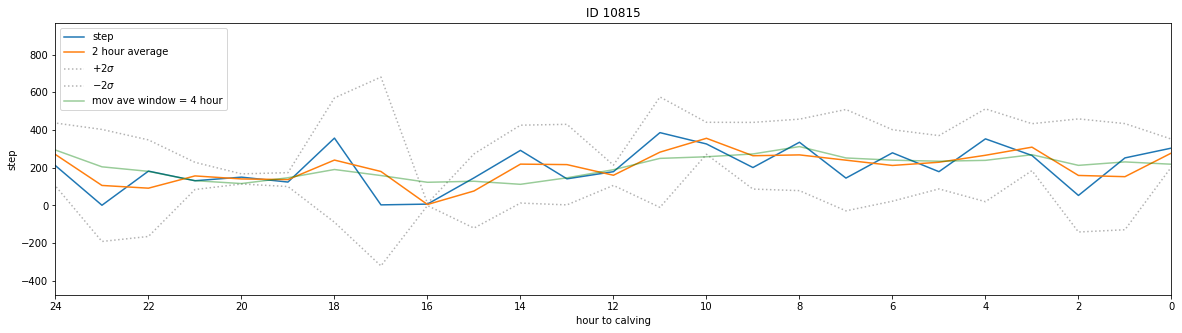

./Documents/namiki_excel/ascend/1081_asc.csv


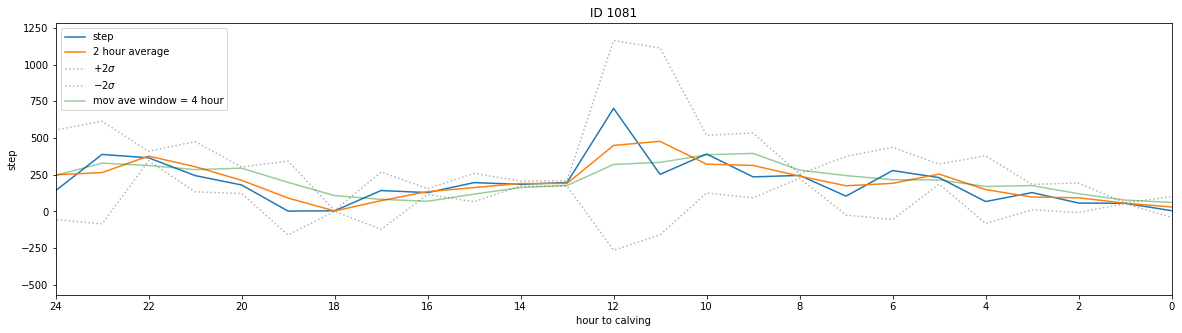

./Documents/namiki_excel/ascend/11064_asc.csv


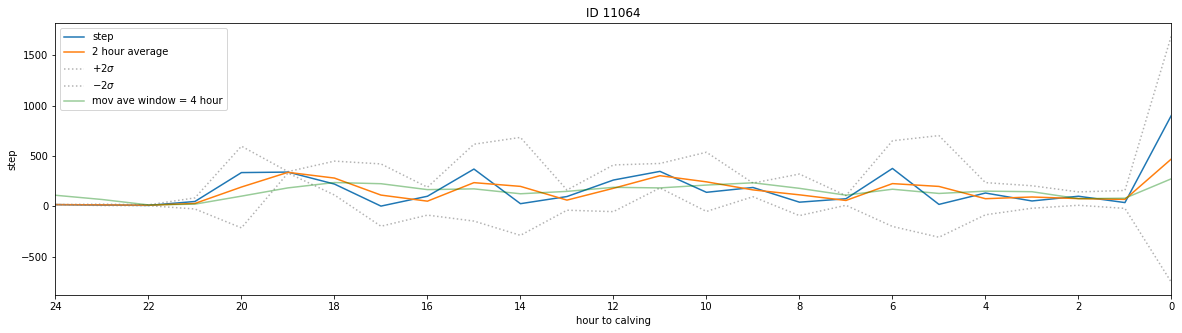

./Documents/namiki_excel/ascend/11153_asc.csv


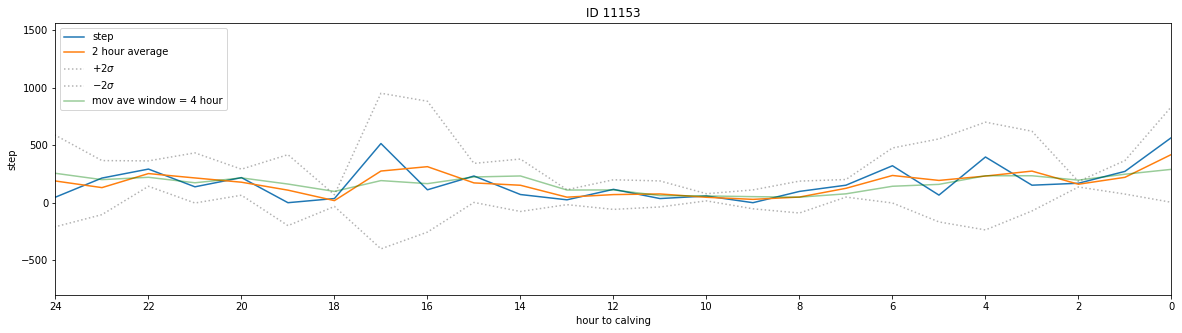

./Documents/namiki_excel/ascend/11513_asc.csv


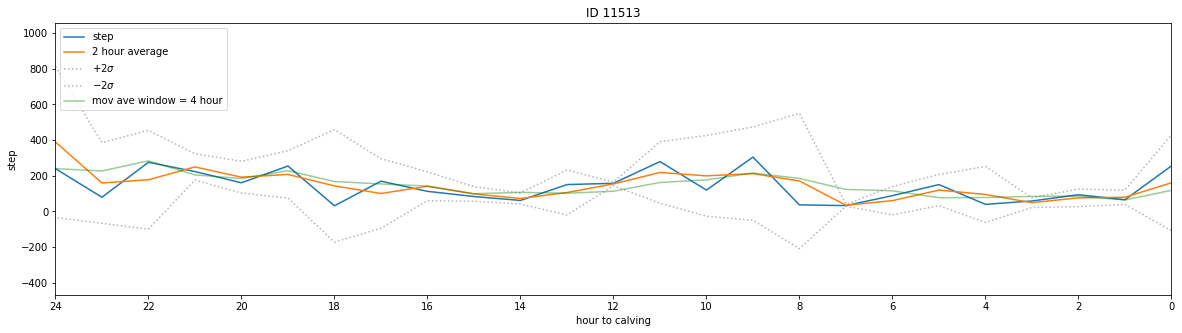

./Documents/namiki_excel/ascend/11600_asc.csv


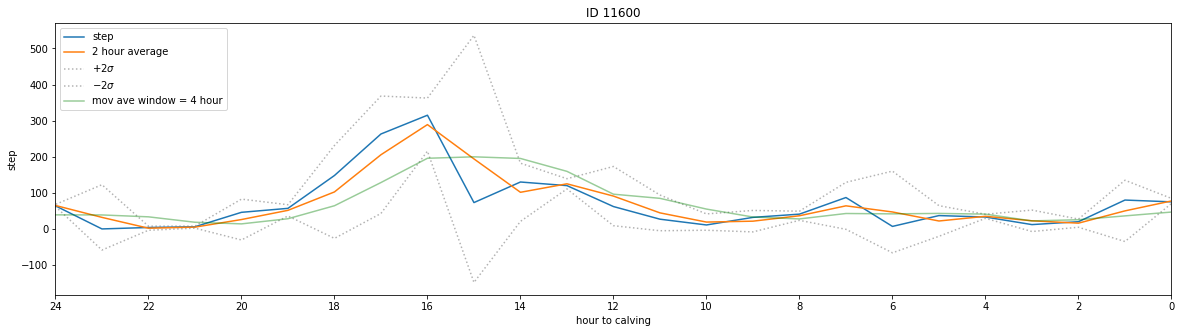

./Documents/namiki_excel/ascend/11867_asc.csv


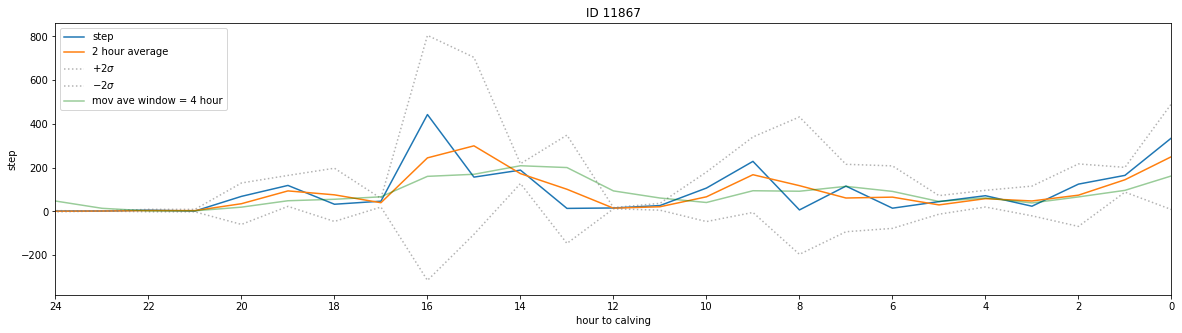

./Documents/namiki_excel/ascend/12029_asc.csv


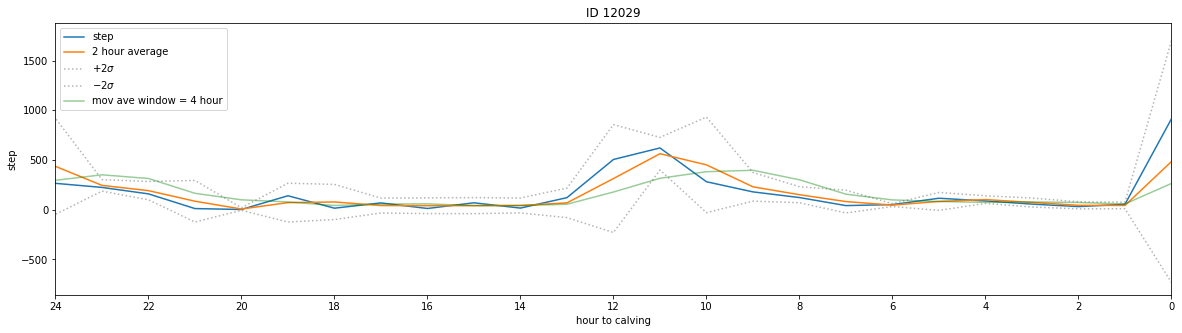

./Documents/namiki_excel/ascend/17451_asc.csv


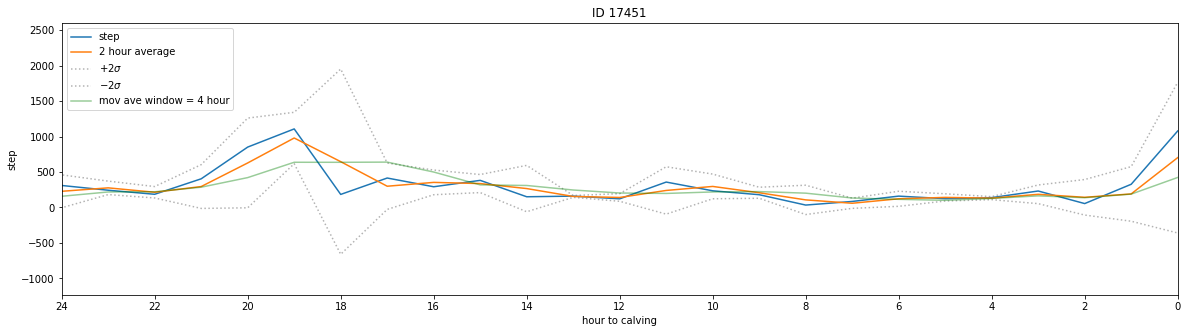

./Documents/namiki_excel/ascend/19557_asc.csv


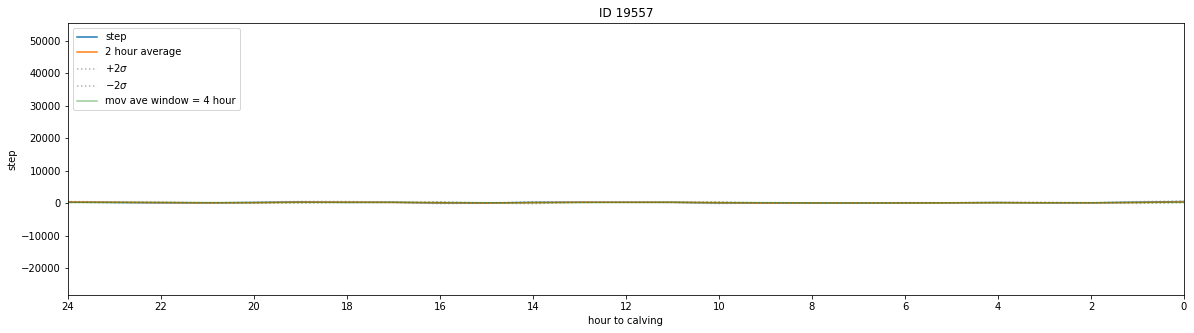

./Documents/namiki_excel/ascend/21470_asc.csv


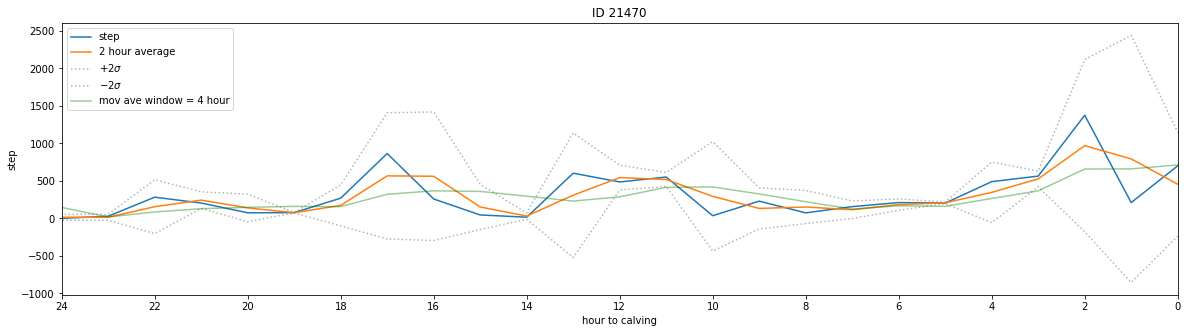

./Documents/namiki_excel/ascend/24750_asc.csv


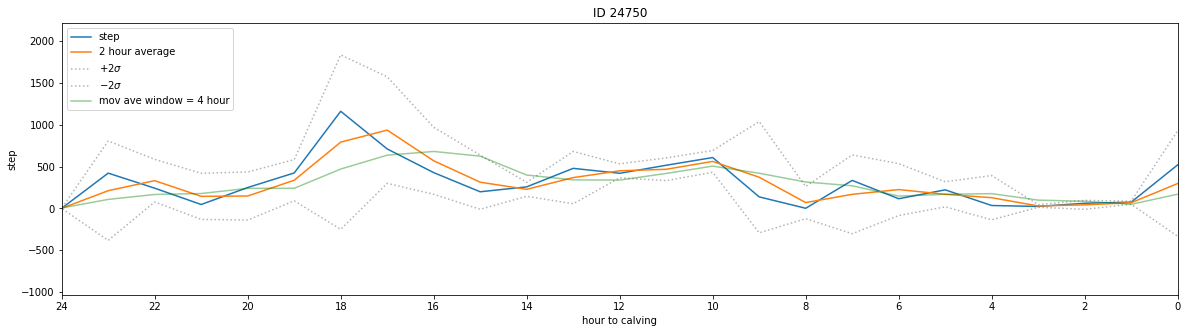

./Documents/namiki_excel/ascend/31103_asc.csv


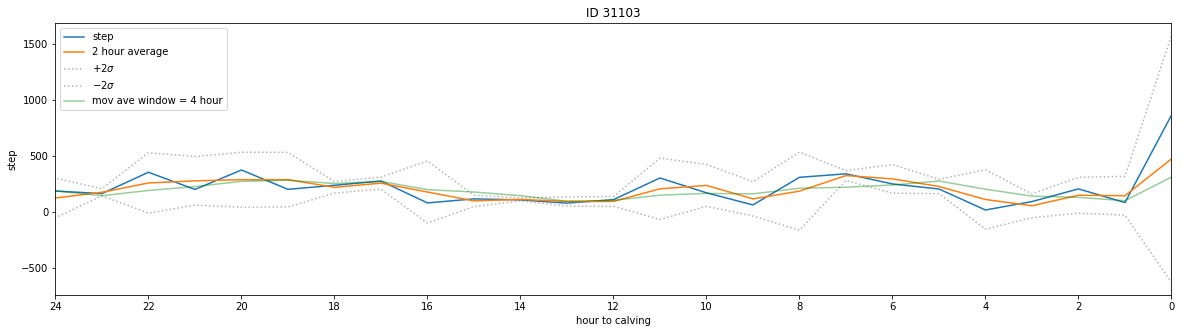

./Documents/namiki_excel/ascend/31968_asc.csv


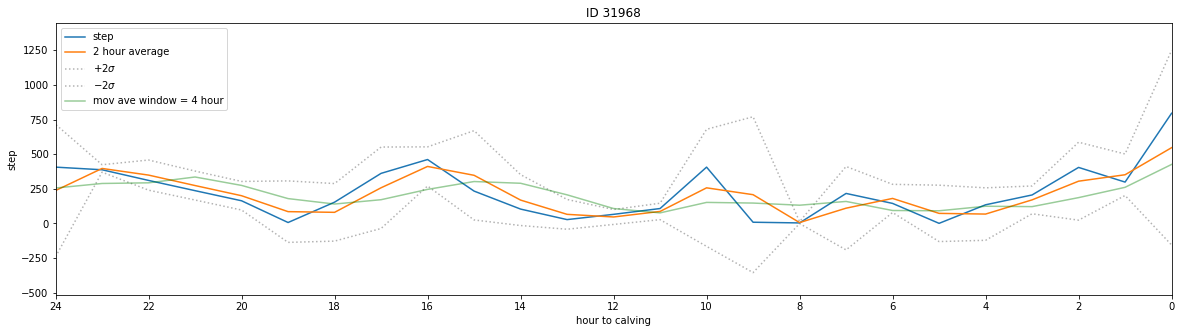

./Documents/namiki_excel/ascend/36177_asc.csv


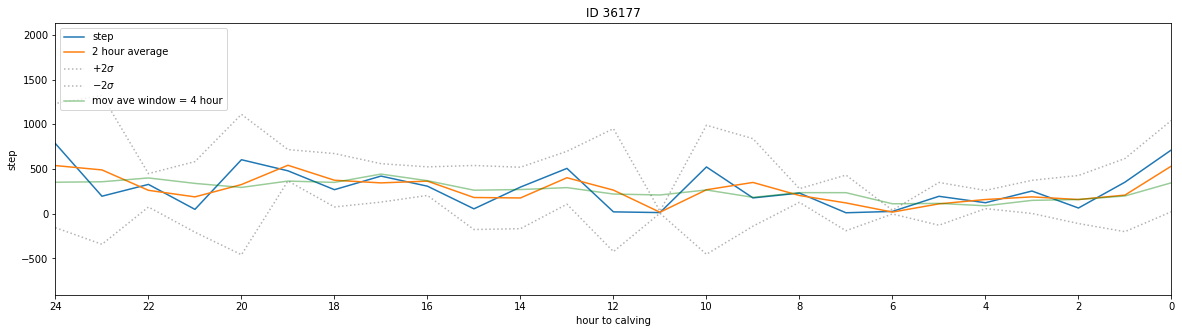

./Documents/namiki_excel/ascend/37531_asc.csv


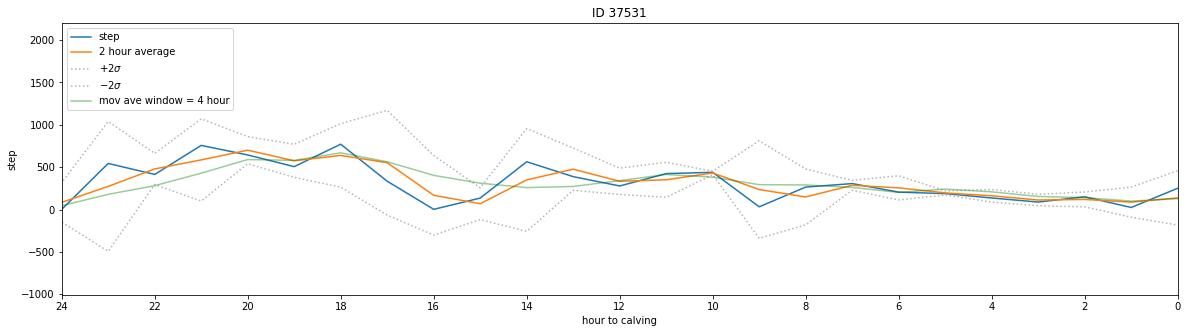

./Documents/namiki_excel/ascend/38613_asc.csv


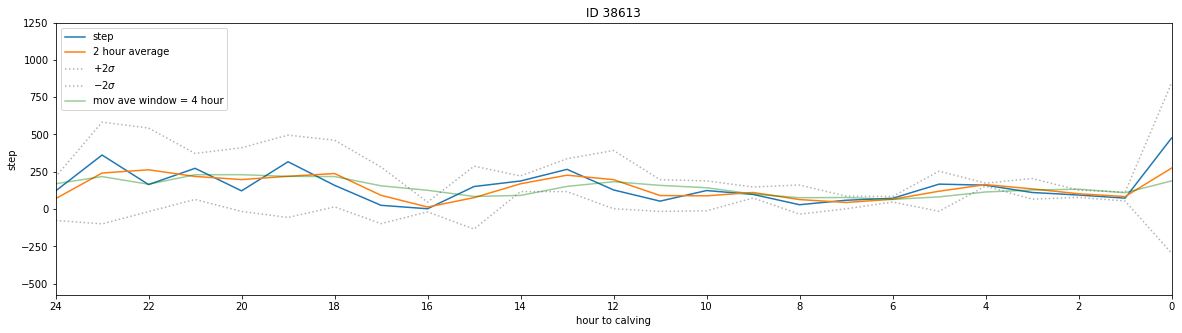

./Documents/namiki_excel/ascend/40465_asc.csv


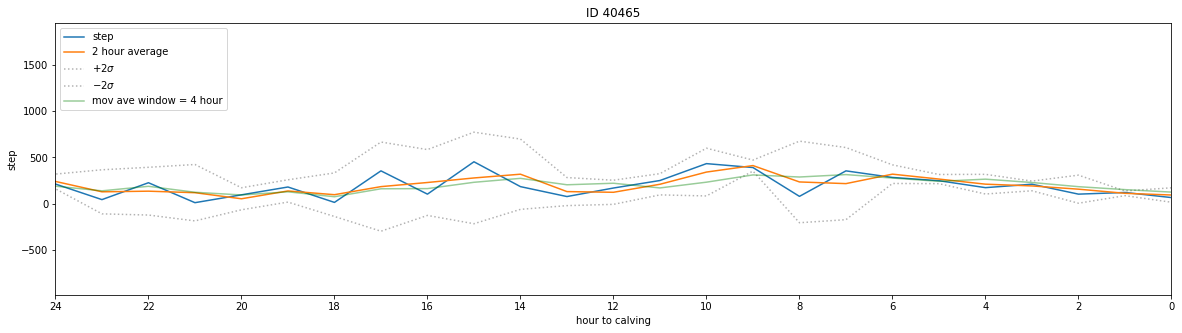

./Documents/namiki_excel/ascend/44675_asc.csv


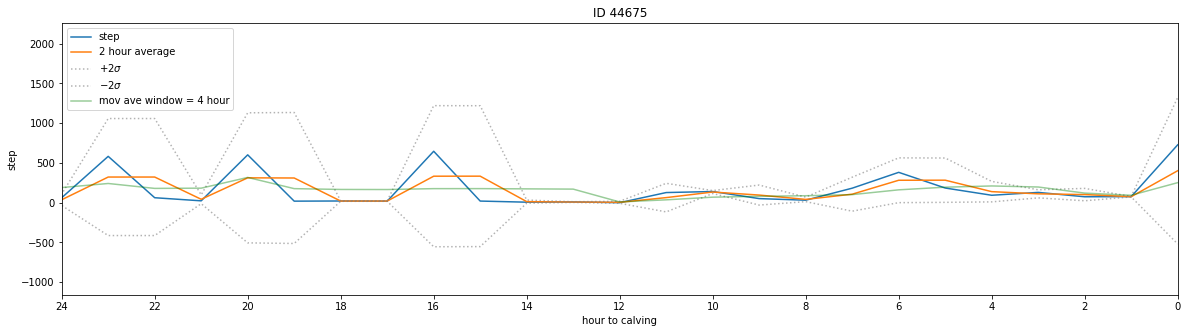

./Documents/namiki_excel/ascend/483_asc.csv


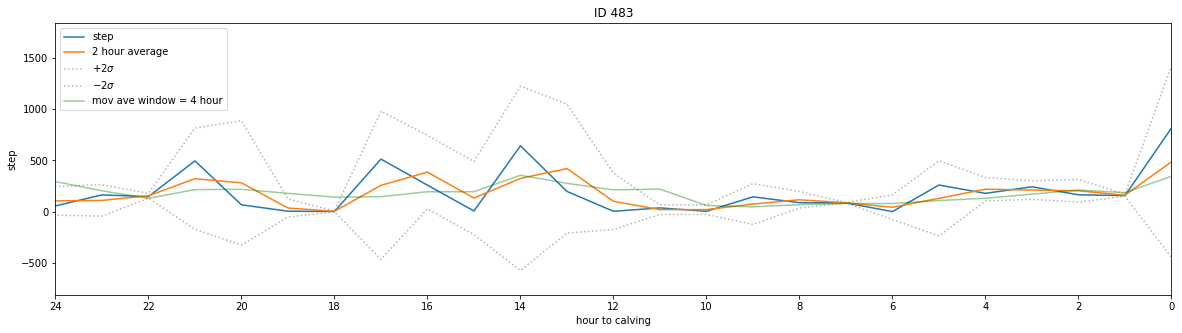

./Documents/namiki_excel/ascend/48696_asc.csv


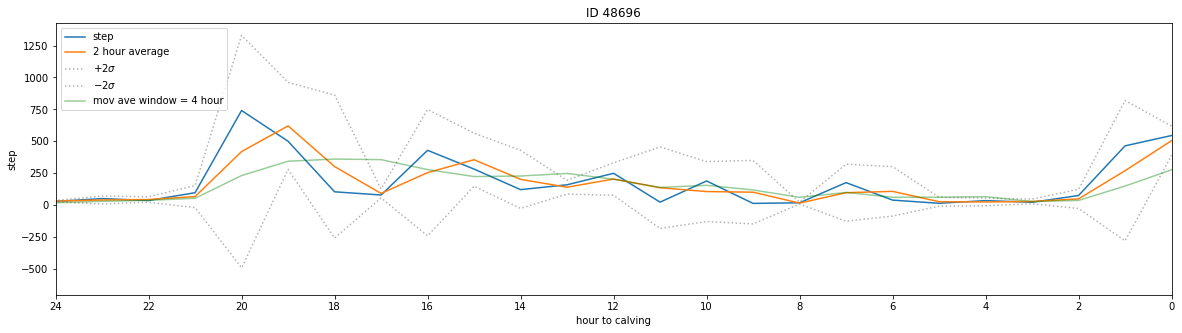

./Documents/namiki_excel/ascend/49098_asc.csv


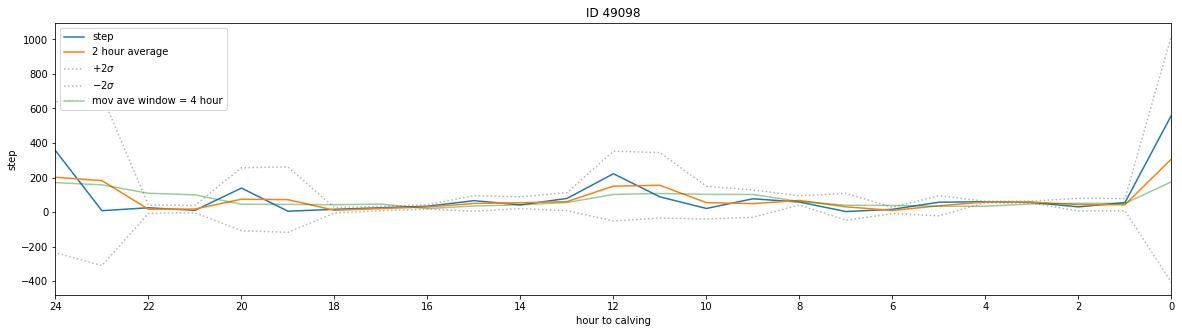

./Documents/namiki_excel/ascend/60462_asc.csv


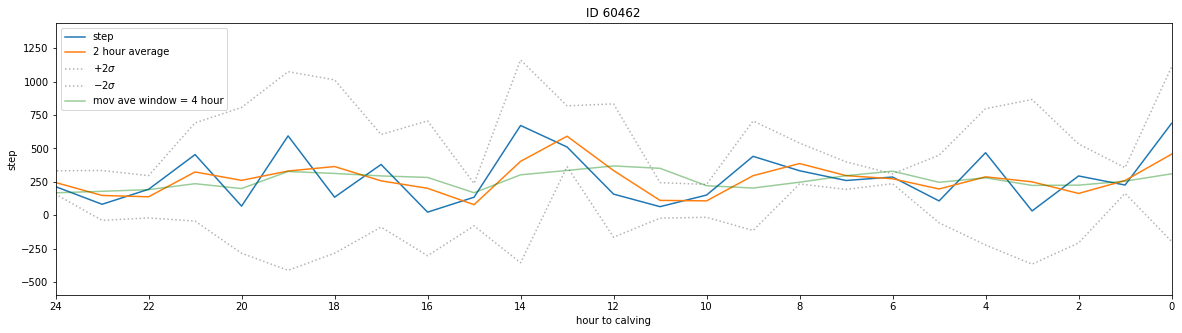

./Documents/namiki_excel/ascend/61172_asc.csv


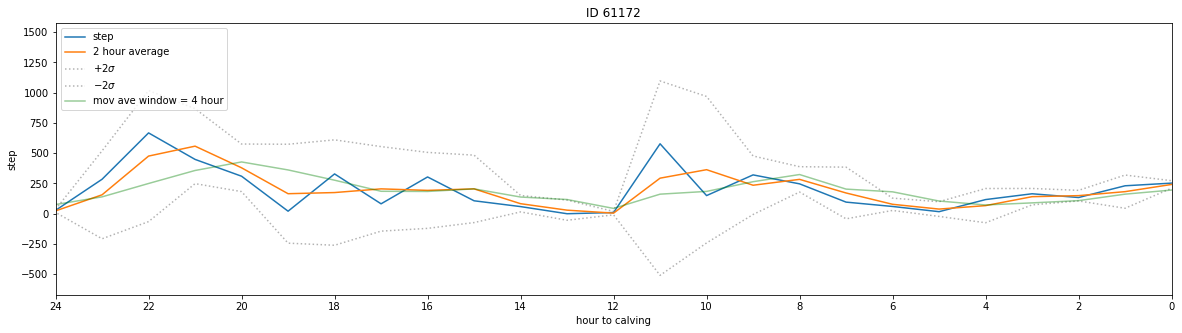

./Documents/namiki_excel/ascend/619_asc.csv


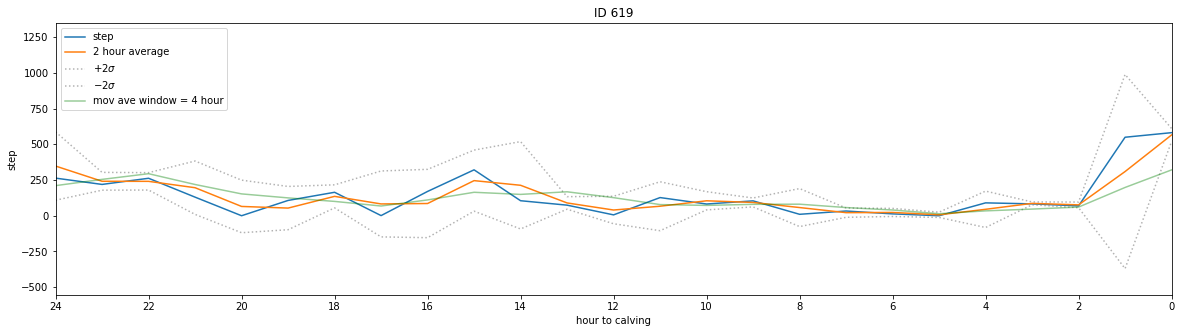

./Documents/namiki_excel/ascend/6327_asc.csv


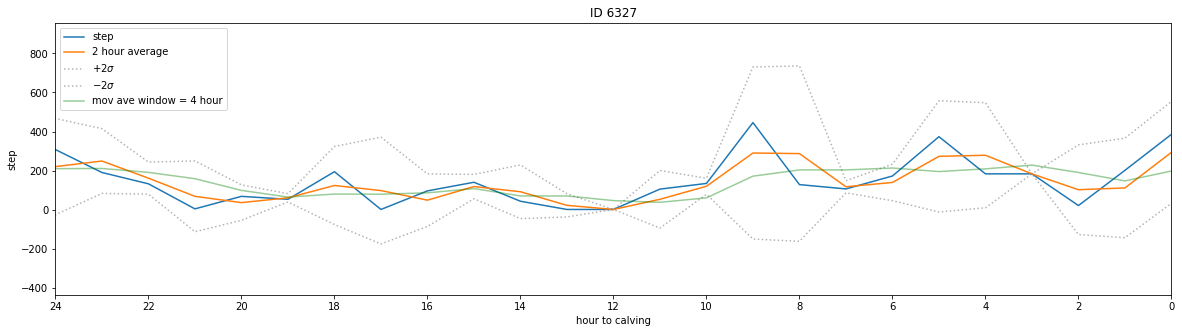

./Documents/namiki_excel/ascend/6826_asc.csv


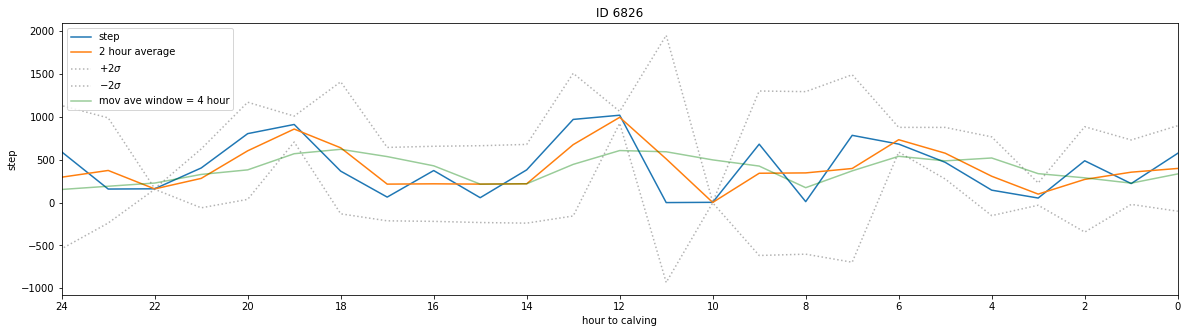

./Documents/namiki_excel/ascend/707_asc.csv


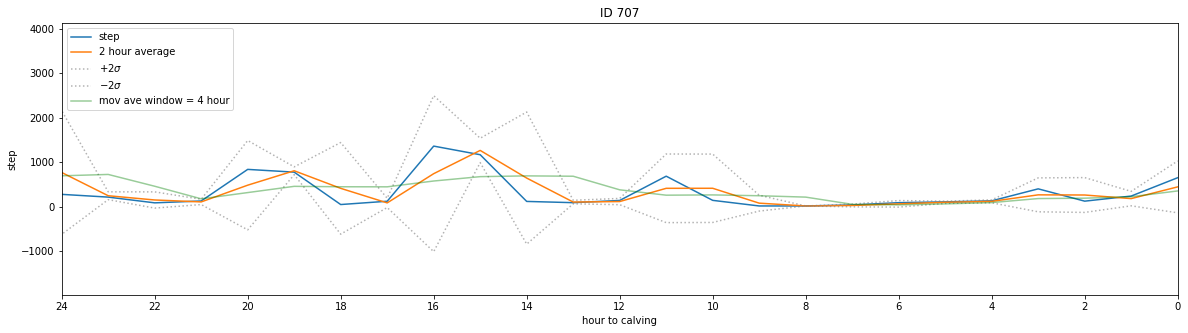

./Documents/namiki_excel/ascend/75013_asc.csv


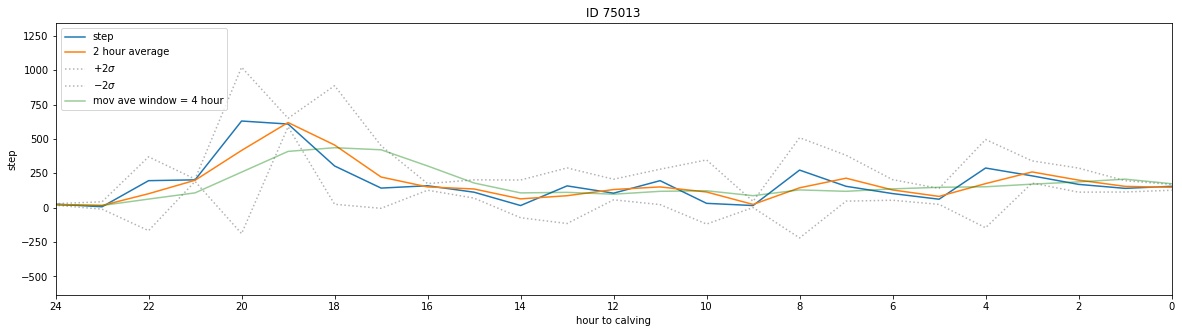

./Documents/namiki_excel/ascend/7534_asc.csv


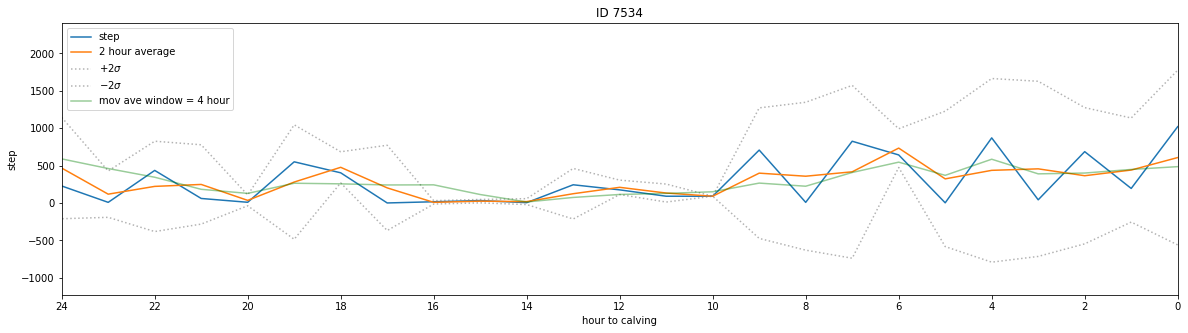

./Documents/namiki_excel/ascend/75599_asc.csv


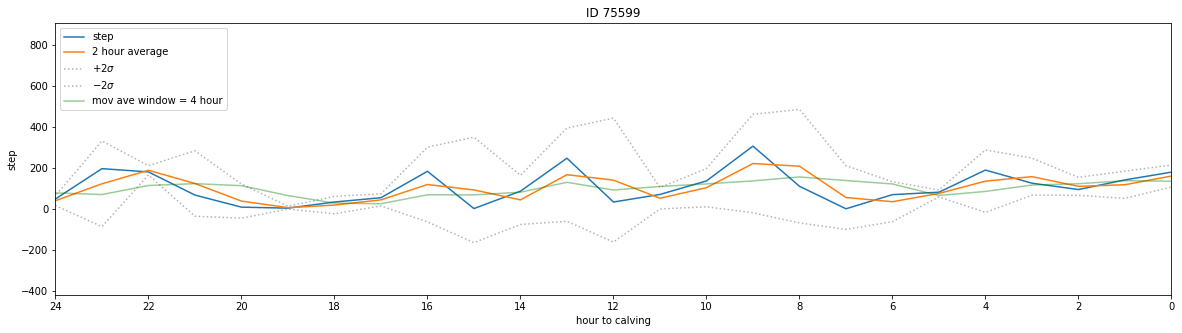

./Documents/namiki_excel/ascend/75735_asc.csv


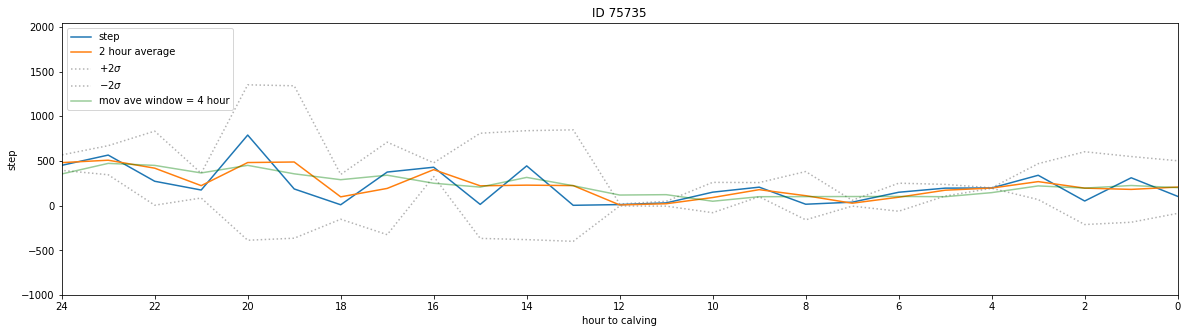

./Documents/namiki_excel/ascend/76444_asc.csv


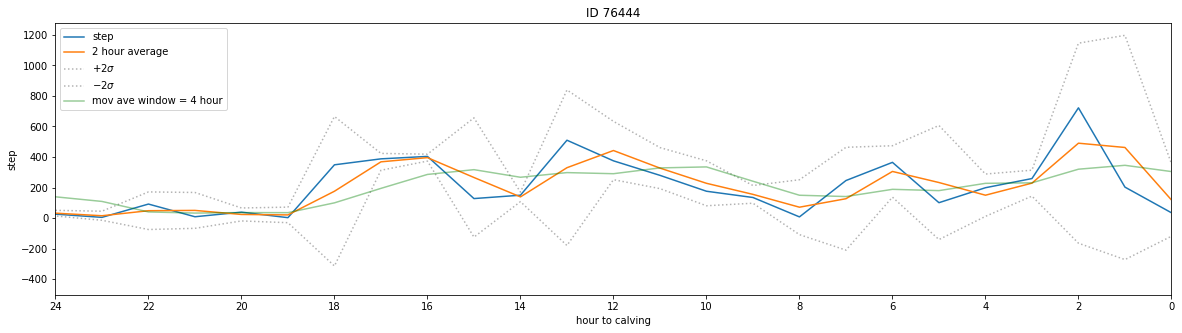

./Documents/namiki_excel/ascend/79936_asc.csv


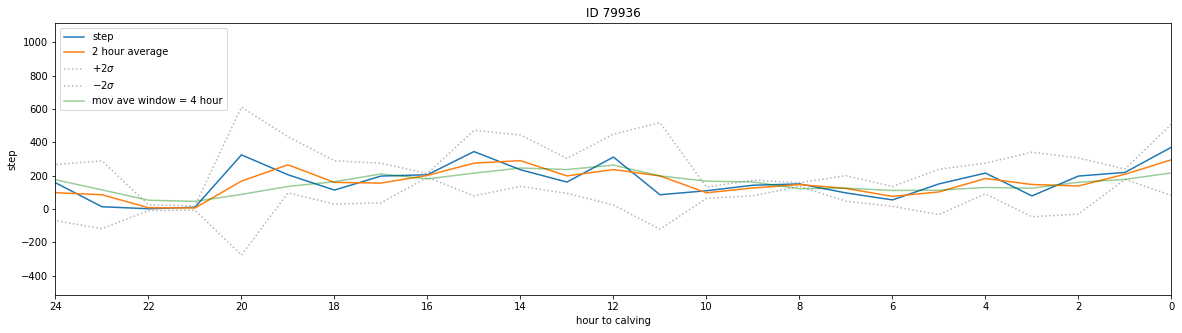

./Documents/namiki_excel/ascend/80590_asc.csv


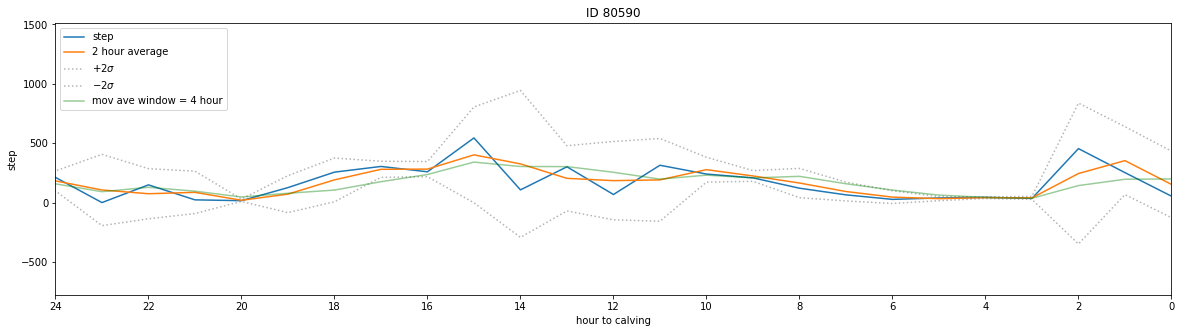

./Documents/namiki_excel/ascend/81257_asc.csv


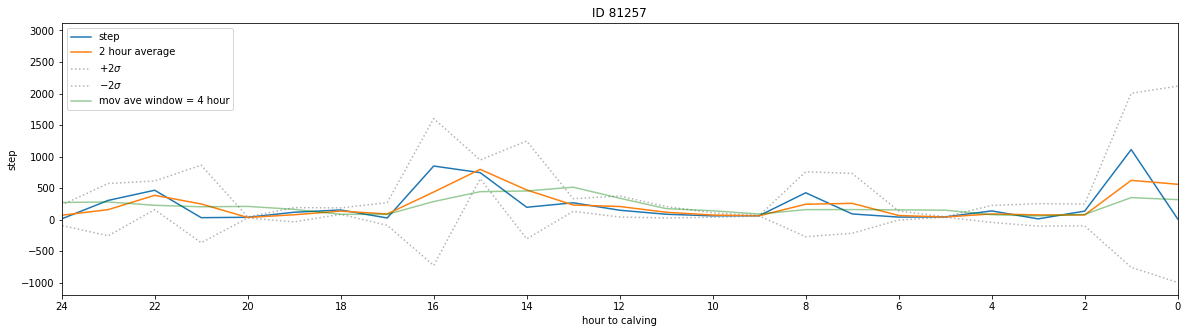

./Documents/namiki_excel/ascend/81444-2_asc.csv


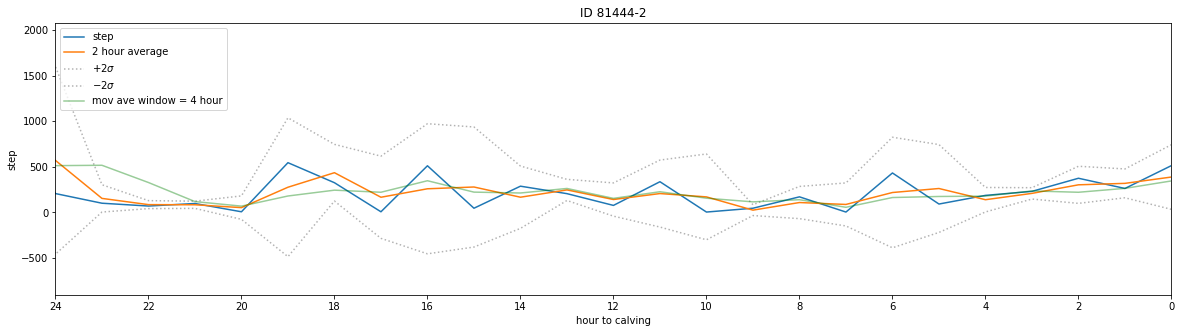

./Documents/namiki_excel/ascend/90802_asc.csv


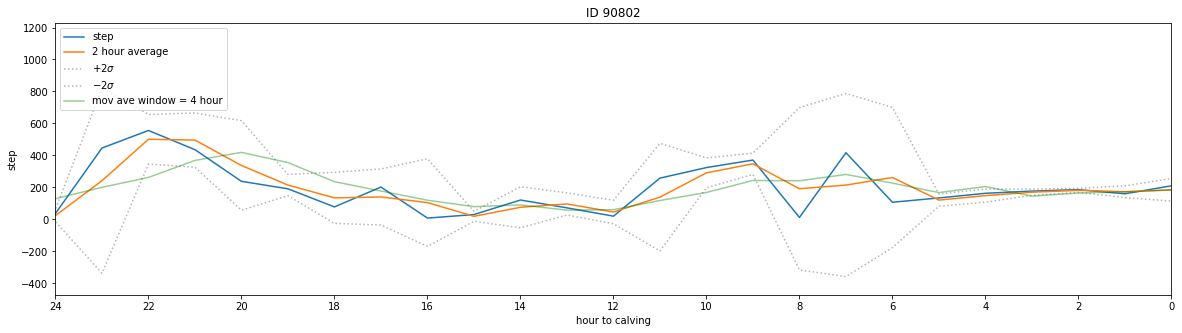

./Documents/namiki_excel/ascend/94150_asc.csv


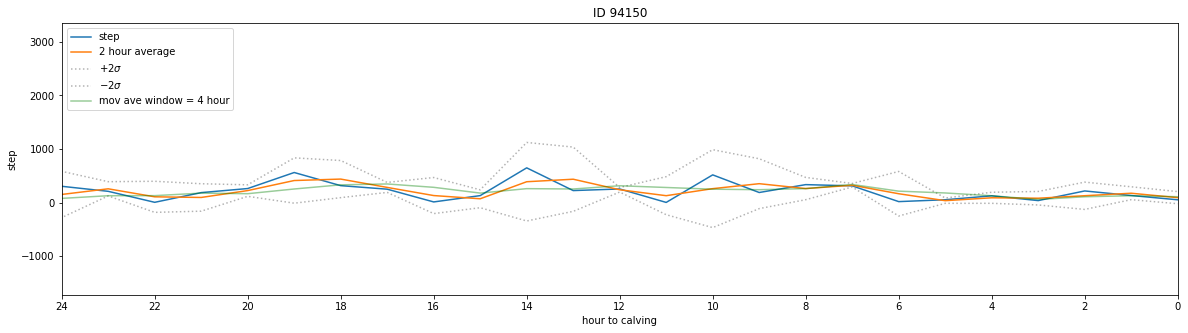

./Documents/namiki_excel/ascend/94263_asc.csv


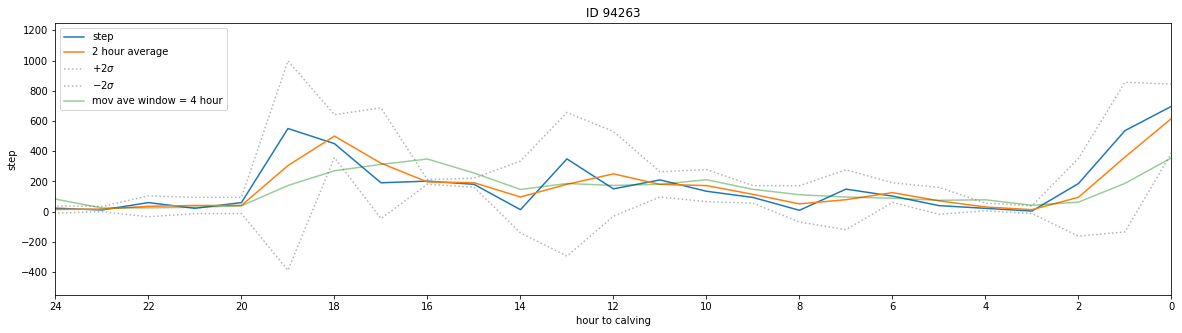

./Documents/namiki_excel/ascend/9780_asc.csv


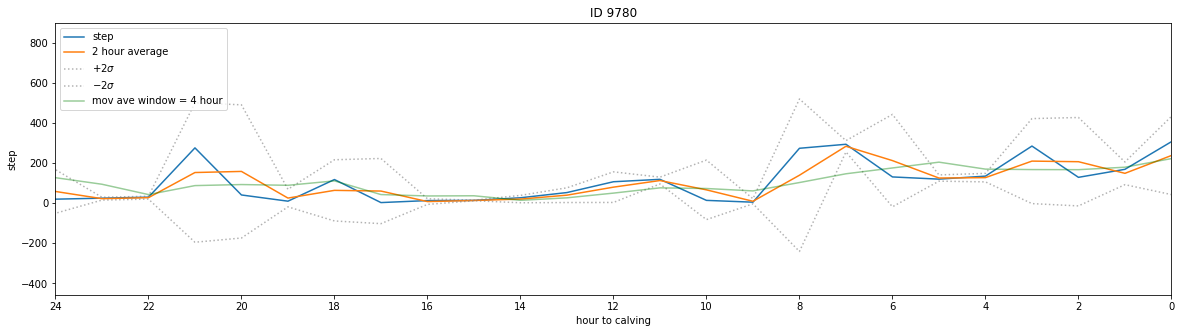

In [89]:
import glob 
filenames = sorted(glob.glob('./Documents/namiki_excel/ascend/*.csv'))

for f in filenames:
    print(f)
    df = pd.read_csv(f).dropna()
    calc_bb("step", df, window=2)